# Business Problem Understanding or Project Understanding
  * Analyse the data which is Top Revenue Product and Best-Selling Product 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Sales Data.csv")

In [3]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
42562,17665,193414,Lightning Charging Cable,1,14.95,2019-04-07 09:20:00,"150 Pine St, New York City, NY 10001",4,14.95,New York City,9
42563,17666,193415,34in Ultrawide Monitor,1,379.99,2019-04-23 18:43:00,"604 Park St, Boston, MA 02215",4,379.99,Boston,18
42564,17667,193416,Wired Headphones,1,11.99,2019-04-09 18:22:00,"404 4th St, Seattle, WA 98101",4,11.99,Seattle,18
42565,17668,193417,Bose SoundSport Headphones,1,99.99,2019-04-20 10:17:00,"648 Wilson St, New York City, NY 10001",4,99.99,New York City,10


# DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42567 entries, 0 to 42566
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        42567 non-null  int64  
 1   Order ID          42567 non-null  int64  
 2   Product           42567 non-null  object 
 3   Quantity Ordered  42567 non-null  int64  
 4   Price Each        42567 non-null  float64
 5   Order Date        42567 non-null  object 
 6   Purchase Address  42567 non-null  object 
 7   Month             42567 non-null  int64  
 8   Sales             42567 non-null  float64
 9   City              42567 non-null  object 
 10  Hour              42567 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 3.6+ MB


In [5]:
df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 16787, 17012, 17085])

In [6]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
17662    2
17663    2
17664    2
17665    2
17666    2
        ..
12516    1
17446    1
17339    1
17324    1
17208    1
Name: count, Length: 25074, dtype: int64

In [7]:
df['Order ID'].unique()

array([295665, 295666, 295667, ..., 193416, 193417, 193418])

In [8]:
df['Order ID'].value_counts()

Order ID
304802    4
296353    4
312462    4
312407    4
295681    4
         ..
193414    1
193415    1
193416    1
193417    1
193394    1
Name: count, Length: 40867, dtype: int64

In [9]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [10]:
df['Product'].value_counts()

Product
Lightning Charging Cable      5008
USB-C Charging Cable          4952
AAA Batteries (4-pack)        4751
AA Batteries (4-pack)         4698
Wired Headphones              4369
Apple Airpods Headphones      3503
Bose SoundSport Headphones    3042
27in FHD Monitor              1670
iPhone                        1575
34in Ultrawide Monitor        1478
27in 4K Gaming Monitor        1400
Google Phone                  1271
Flatscreen TV                 1107
Macbook Pro Laptop            1086
20in Monitor                   948
ThinkPad Laptop                916
Vareebadd Phone                497
LG Dryer                       160
LG Washing Machine             136
Name: count, dtype: int64

In [11]:
df['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6])

In [12]:
df['Quantity Ordered'].value_counts()

Quantity Ordered
1    38557
2     3065
3      686
4      178
5       54
6       23
7        4
Name: count, dtype: int64

In [13]:
df['Price Each'].unique()

array([1700.  ,  600.  ,   11.95,  149.99,    3.84,   99.99,    2.99,
        999.99,   14.95,   11.99,  150.  ,  400.  ,  700.  ,  109.99,
        379.99,  300.  ,  389.99])

In [14]:
df['Price Each'].value_counts()

Price Each
14.95      5008
11.95      4952
2.99       4751
3.84       4698
11.99      4369
150.00     3503
99.99      3042
149.99     1670
700.00     1575
600.00     1567
379.99     1478
389.99     1400
300.00     1107
1700.00    1086
109.99      948
999.99      916
400.00      497
Name: count, dtype: int64

In [15]:
df['Order Date'].unique()

array(['2019-12-30 00:01:00', '2019-12-29 07:03:00',
       '2019-12-12 18:21:00', ..., '2019-04-23 18:43:00',
       '2019-04-09 18:22:00', '2019-04-19 21:21:00'], dtype=object)

In [16]:
df['Order Date'].value_counts()

Order Date
2019-12-15 20:16:00    8
2019-12-11 13:24:00    7
2019-04-02 13:24:00    7
2019-12-06 16:10:00    6
2019-04-06 18:47:00    6
                      ..
2019-12-17 18:32:00    1
2019-12-25 19:02:00    1
2019-04-29 17:37:00    1
2019-04-21 14:21:00    1
2019-04-16 22:57:00    1
Name: count, Length: 30493, dtype: int64

In [17]:
df['Purchase Address'].unique()

array(['136 Church St, New York City, NY 10001',
       '562 2nd St, New York City, NY 10001',
       '277 Main St, New York City, NY 10001', ...,
       '404 4th St, Seattle, WA 98101',
       '648 Wilson St, New York City, NY 10001',
       '393 Dogwood St, San Francisco, CA 94016'], dtype=object)

In [18]:
df['Purchase Address'].value_counts()

Purchase Address
727 9th St, San Francisco, CA 94016        5
146 5th St, San Francisco, CA 94016        5
79 Elm St, Boston, MA 02215                4
594 6th St, San Francisco, CA 94016        4
354 Lincoln St, San Francisco, CA 94016    4
                                          ..
150 Pine St, New York City, NY 10001       1
604 Park St, Boston, MA 02215              1
404 4th St, Seattle, WA 98101              1
648 Wilson St, New York City, NY 10001     1
759 13th St, Austin, TX 73301              1
Name: count, Length: 38567, dtype: int64

In [19]:
df['Month'].unique()

array([12,  1,  4,  5])

In [20]:
df['Month'].value_counts()

Month
12    24955
4     17551
1        34
5        27
Name: count, dtype: int64

In [21]:
df['Sales'].unique()

array([1.7000e+03, 6.0000e+02, 1.1950e+01, 1.4999e+02, 3.8400e+00,
       2.3900e+01, 9.9990e+01, 1.1960e+01, 9.9999e+02, 7.6800e+00,
       5.9800e+00, 1.4950e+01, 1.1990e+01, 1.5000e+02, 4.0000e+02,
       2.3980e+01, 8.9700e+00, 2.9900e+00, 7.0000e+02, 1.0999e+02,
       3.7999e+02, 3.0000e+02, 1.1520e+01, 3.8999e+02, 2.9900e+01,
       3.5970e+01, 1.5360e+01, 3.5850e+01, 2.0930e+01, 1.9998e+02,
       1.7940e+01, 4.4850e+01, 7.5998e+02, 1.9200e+01, 4.7960e+01,
       2.1998e+02, 2.6880e+01, 7.7998e+02, 2.9998e+02, 2.3040e+01,
       4.5000e+02, 5.9800e+01, 1.2000e+03, 3.4000e+03, 4.7800e+01,
       7.1700e+01, 1.4000e+03])

In [22]:
df['Sales'].value_counts()

Sales
14.95      4706
11.95      4539
11.99      4030
150.00     3474
3.84       3432
2.99       3180
99.99      3017
149.99     1664
700.00     1573
600.00     1569
379.99     1472
389.99     1397
300.00     1132
1700.00    1084
5.98       1060
109.99      940
7.68        921
999.99      916
400.00      497
23.90       382
8.97        349
29.90       314
23.98       304
11.52       254
11.96       107
15.36        66
35.97        32
35.85        29
199.98       25
44.85        21
19.20        20
17.94        18
219.98        8
299.98        6
759.98        6
23.04         4
20.93         3
779.98        3
47.96         3
1400.00       2
3400.00       2
26.88         1
450.00        1
1200.00       1
59.80         1
47.80         1
71.70         1
Name: count, dtype: int64

In [23]:
df['City'].unique()

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [24]:
df['City'].value_counts()

City
San Francisco    10287
Los Angeles       6808
New York City     5747
Boston            4528
Atlanta           3397
Seattle           3376
Dallas            3313
Portland          2823
Austin            2288
Name: count, dtype: int64

In [25]:
df['Hour'].unique()

array([ 0,  7, 18, 15, 12, 22,  9, 23, 11, 13, 17, 19, 14, 16,  1,  6, 10,
       20, 21,  8,  3,  5,  2,  4])

In [26]:
df['Hour'].value_counts()

Hour
19    3030
12    2853
18    2840
11    2815
20    2797
13    2792
10    2585
14    2567
17    2411
21    2400
15    2348
16    2339
22    1982
9     1964
8     1451
23    1438
7      960
0      859
6      568
1      553
5      328
2      285
4      212
3      190
Name: count, dtype: int64

In [27]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [28]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df.drop(columns=['Order ID'],inplace=True,axis=1)
df.drop(columns=['City'],inplace=True,axis=1)
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour
0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,0
1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,7
2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,18
3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,15
4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,12
...,...,...,...,...,...,...,...,...
42562,Lightning Charging Cable,1,14.95,2019-04-07 09:20:00,"150 Pine St, New York City, NY 10001",4,14.95,9
42563,34in Ultrawide Monitor,1,379.99,2019-04-23 18:43:00,"604 Park St, Boston, MA 02215",4,379.99,18
42564,Wired Headphones,1,11.99,2019-04-09 18:22:00,"404 4th St, Seattle, WA 98101",4,11.99,18
42565,Bose SoundSport Headphones,1,99.99,2019-04-20 10:17:00,"648 Wilson St, New York City, NY 10001",4,99.99,10


In [29]:
continuous=['Price Each','Sales']
discrete_count=['Quantity Ordered','Month','Hour']
categorical=['Product','Purchase Address']
time_series=['Order Date']

In [30]:
df[continuous].describe()

,Price Each,Sales
count,42567.000000,42567.000000
mean,184.331796,185.444651
std,332.656511,333.113237
min,2.990000,2.990000
25%,11.950000,11.950000
50%,14.950000,14.950000
75%,150.000000,150.000000
max,1700.000000,3400.000000


In [31]:
df[discrete_count].describe()

,Quantity Ordered,Month,Hour
count,42567.000000,42567.000000,42567.000000
mean,1.125120,8.688256,14.382432
std,0.442312,3.943170,5.417389
min,1.000000,1.000000,0.000000
25%,1.000000,4.000000,11.000000
50%,1.000000,12.000000,15.000000
75%,1.000000,12.000000,19.000000
max,7.000000,12.000000,23.000000


In [32]:
df[categorical].describe()

,Product,Purchase Address
count,42567,42567
unique,19,38567
top,Lightning Charging Cable,"727 9th St, San Francisco, CA 94016"
freq,5008,5


In [33]:
df[time_series].describe()

,Order Date
count,42567
unique,30493
top,2019-12-15 20:16:00
freq,8


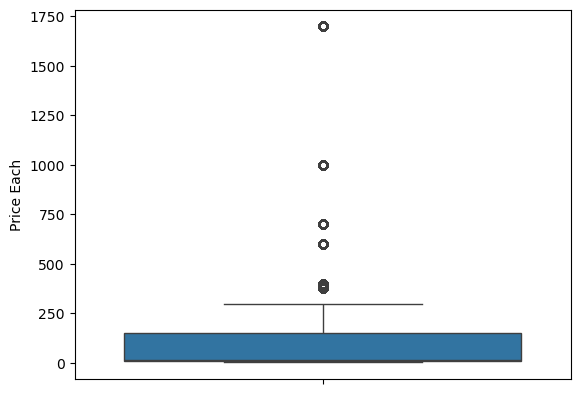

In [34]:
sns.boxplot(df['Price Each'])
plt.show()

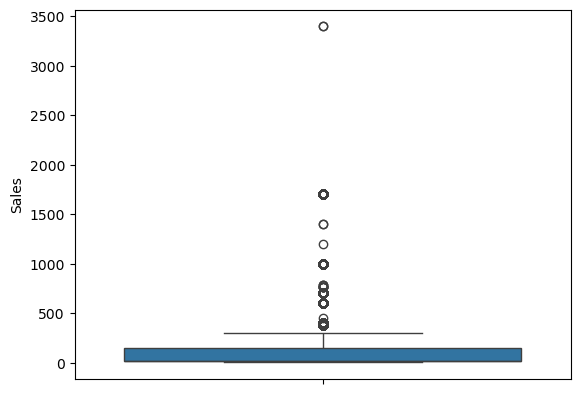

In [35]:
sns.boxplot(df['Sales'])
plt.show()

In [36]:
df[continuous].skew()

Price Each    2.876063
Sales         2.897677
dtype: float64

In [37]:
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour
0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,0
1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,7
2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,18
3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,15
4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,12
...,...,...,...,...,...,...,...,...
42562,Lightning Charging Cable,1,14.95,2019-04-07 09:20:00,"150 Pine St, New York City, NY 10001",4,14.95,9
42563,34in Ultrawide Monitor,1,379.99,2019-04-23 18:43:00,"604 Park St, Boston, MA 02215",4,379.99,18
42564,Wired Headphones,1,11.99,2019-04-09 18:22:00,"404 4th St, Seattle, WA 98101",4,11.99,18
42565,Bose SoundSport Headphones,1,99.99,2019-04-20 10:17:00,"648 Wilson St, New York City, NY 10001",4,99.99,10


# DATA ANALYSIS
* UNIVARIENT
* BIVARIENT
* MULTIVARIENT

In [38]:
df['Product'].describe()

count                        42567
unique                          19
top       Lightning Charging Cable
freq                          5008
Name: Product, dtype: object

In [39]:
df['Purchase Address'].describe()

count                                   42567
unique                                  38567
top       727 9th St, San Francisco, CA 94016
freq                                        5
Name: Purchase Address, dtype: object

In [40]:
df['Sales'].describe()

count    42567.000000
mean       185.444651
std        333.113237
min          2.990000
25%         11.950000
50%         14.950000
75%        150.000000
max       3400.000000
Name: Sales, dtype: float64

In [41]:
pd.crosstab(df['Product'],df['Purchase Address'],normalize=True)

Purchase Address,"1 12th St, San Francisco, CA 94016","1 14th St, New York City, NY 10001","1 14th St, Seattle, WA 98101","1 1st St, Austin, TX 73301","1 2nd St, Atlanta, GA 30301","1 4th St, Dallas, TX 75001","1 5th St, New York City, NY 10001","1 6th St, Los Angeles, CA 90001","1 7th St, Los Angeles, CA 90001","1 9th St, San Francisco, CA 94016",...,"999 Maple St, Atlanta, GA 30301","999 Maple St, Dallas, TX 75001","999 Maple St, San Francisco, CA 94016","999 North St, Dallas, TX 75001","999 North St, Seattle, WA 98101","999 Pine St, Boston, MA 02215","999 Pine St, San Francisco, CA 94016","999 Walnut St, Portland, OR 97035","999 West St, Dallas, TX 75001","999 West St, Los Angeles, CA 90001"
Product,,,,,,,,,,,,,,,,,,,,,
20in Monitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27in 4K Gaming Monitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27in FHD Monitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34in Ultrawide Monitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AA Batteries (4-pack),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,...,0.000000,0.000023,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000
AAA Batteries (4-pack),0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000023,0.000000
Apple Airpods Headphones,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bose SoundSport Headphones,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000
Flatscreen TV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
df['Sales'].sum()

np.float64(7893822.469999998)

In [43]:
df.groupby('Month')['Sales'].sum()

Month
1        8670.29
4     3264666.06
5        9859.29
12    4610626.83
Name: Sales, dtype: float64

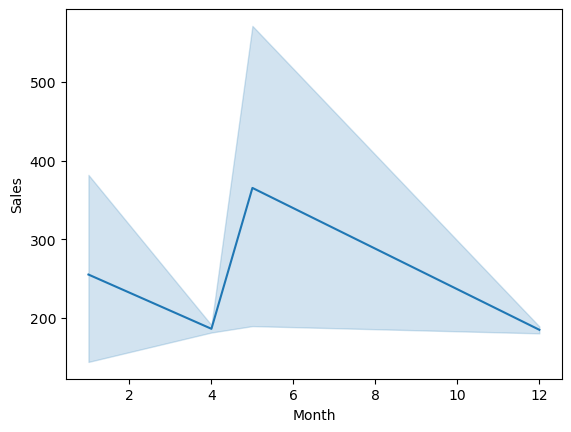

In [44]:
sns.lineplot(x='Month',y='Sales',data=df)
plt.show()

* December (12) has the highest sales, likely due to holiday shopping.
* April and May have the lowest sales.

In [45]:
df.groupby('Hour')['Sales'].sum()

Hour
0     166928.83
1     112177.08
2      56007.73
3      35840.12
4      37668.62
5      54161.59
6      93194.22
7     189840.83
8     278858.07
9     394769.74
10    467432.93
11    510210.43
12    519092.57
13    489833.56
14    492382.05
15    447709.34
16    412405.88
17    474073.50
18    502135.42
19    563478.61
20    530863.79
21    437769.88
22    363532.19
23    263455.49
Name: Sales, dtype: float64

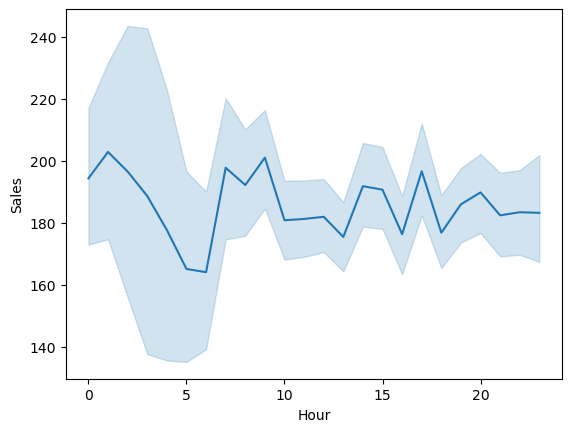

In [46]:
sns.lineplot(x='Hour',y='Sales',data=df)
plt.show()

* Peak hours are 12 PM to 8 PM, especially 6 PM – 8 PM.
* 2 AM to 6 AM have the lowest sales.

In [47]:
df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

Product
Macbook Pro Laptop            1849600.00
iPhone                        1103900.00
ThinkPad Laptop                915990.84
Google Phone                   763200.00
34in Ultrawide Monitor         563905.16
27in 4K Gaming Monitor         547155.97
Apple Airpods Headphones       529950.00
Flatscreen TV                  333000.00
Bose SoundSport Headphones     306669.33
27in FHD Monitor               251383.24
Vareebadd Phone                198800.00
20in Monitor                   105150.44
LG Dryer                        96000.00
LG Washing Machine              81600.00
Lightning Charging Cable        80236.65
USB-C Charging Cable            64530.00
Wired Headphones                56904.54
AA Batteries (4-pack)           24695.04
AAA Batteries (4-pack)          21151.26
Name: Sales, dtype: float64

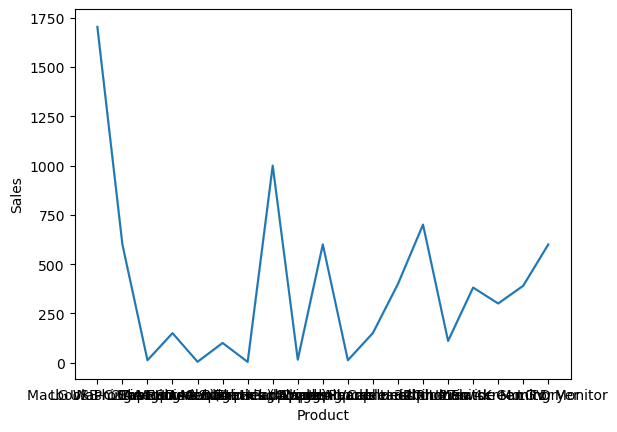

In [48]:
sns.lineplot(x='Product',y='Sales',data=df)
plt.show()

* Top Revenue Product is Macbook Pro or Monitors.
* AAA Batteries (4-pack) is lowest Revenue Product.

In [49]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        7074
AA Batteries (4-pack)         6431
USB-C Charging Cable          5400
Lightning Charging Cable      5367
Wired Headphones              4746
Apple Airpods Headphones      3533
Bose SoundSport Headphones    3067
27in FHD Monitor              1676
iPhone                        1577
34in Ultrawide Monitor        1484
27in 4K Gaming Monitor        1403
Google Phone                  1272
Flatscreen TV                 1110
Macbook Pro Laptop            1088
20in Monitor                   956
ThinkPad Laptop                916
Vareebadd Phone                497
LG Dryer                       160
LG Washing Machine             136
Name: Quantity Ordered, dtype: int64

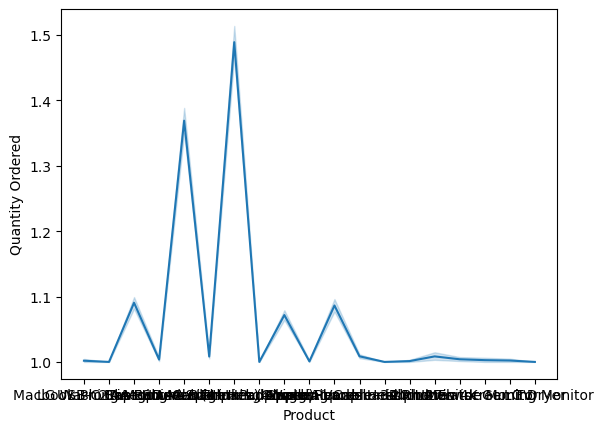

In [50]:
sns.lineplot(x='Product',y='Quantity Ordered',data=df)
plt.show()

* Best-Selling Product is AAA Batteries (4-pack).
* LG Washing Machine is lowest selling product.  

# OBSERVATIONS
  # Best Month is Likely December
  # Best Time is 12 PM to 8 PM, especially 6 PM – 8 PM.
  # Top Revenue Product is Macbook Pro or Monitors
  # Best-Selling Product is AAA Batteries (4-pack)
